Libraries

In [ ]:
# System & Environment
import os

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Deep Learning (Keras/TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Loading datasets
import kagglehub

Downloading 3 Datasets

In [ ]:
# --- Dataset 1 ---
path1 = kagglehub.dataset_download("smayanj/diabetes-risk-dataset")
print("Dataset 1 files:", os.listdir(path1))

# --- Dataset 2 ---
#https://ieee-dataport.org/documents/diabetesdataupload#files

# Dataset3
#https://data.mendeley.com/datasets/pd64hfttwy/1

Dataset 1 files: ['diabetes_risk_dataset.csv']


loading the 3 datasets

In [ ]:
df1 = pd.read_csv(os.path.join(path1, "diabetes_risk_dataset.csv"))
df2 = pd.read_csv( "dataset2_early_stage.csv")
df3 = pd.read_csv("dataset3_pima_indians.csv")

Saving CSVs in working directory

In [ ]:
df1.to_csv("dataset1_diabetes_risk.csv", index=False)


Exploring DF 1

In [ ]:
print(df1.head())

print("\nDataset 1 Shape:",df1.shape)

print(df1.columns.tolist())

   age        bmi  glucose_level physical_activity_level  family_history  \
0   58  33.154816      71.049867                     low               0   
1   71  26.786882     125.964887                     low               0   
2   48  20.977319      61.876196                moderate               1   
3   34  27.959924     137.648074                     low               0   
4   62  28.304175      65.879564                moderate               0   

   smoker  at_risk_diabetes  
0       0                 1  
1       0                 0  
2       1                 0  
3       0                 0  
4       0                 0  

Dataset 1 Shape: (100000, 7)
['age', 'bmi', 'glucose_level', 'physical_activity_level', 'family_history', 'smoker', 'at_risk_diabetes']


Exploring DF 2

In [ ]:
print(df2.head())

print("\nDataset 2 Shape:", df2.shape)

print(df2.columns.tolist())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

Exploring DF 3

In [ ]:
print(df3.head())

print("\nDataset 3 Shape:", df3.shape)

print(df3.columns.tolist())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset 3 Shape: (768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
for i, df in enumerate([df1, df2, df3], start=1):
    print(f"Missing values in df{i}:\n")
    print(df.isnull().sum())
    print("-" * 40)

Missing values in df1:

age                        0
bmi                        0
glucose_level              0
physical_activity_level    0
family_history             0
smoker                     0
at_risk_diabetes           0
dtype: int64
----------------------------------------
Missing values in df2:

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
----------------------------------------
Missing values in df3:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0

Encoding DF 2

In [ ]:
# Lowercase column names
df2.columns = df2.columns.str.lower().str.replace(' ', '_')


# (Male=1, Female=0)
df2['gender'] = df2['gender'].map({'Male': 1, 'Female': 0})

#  Yes=1, No=0
cat_cols = df2.columns.drop(['age', 'gender', 'class'])  # Exclude numeric + target
for col in cat_cols:
    df2[col] = df2[col].map({'Yes': 1, 'No': 0})

# 'class' Positive=1, Negative=0
df2['target'] = df2['class'].map({'Positive': 1, 'Negative': 0})

# Drop original target
df2.drop('class', axis=1, inplace=True)

df2.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,target
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Renaming columns in Df1 and DF3 for consistency

In [ ]:
# Rename df1 glucose_level to glucose to match df3
df1.rename(columns={'glucose_level': 'glucose'}, inplace=True)
df1.rename(columns={'at_risk_diabetes': 'target'}, inplace=True)

# Rename df3 bloodpressure to blood_pressure to match naming style
df3.rename(columns={
    'Pregnancies': 'pregnancies',
    'Glucose': 'glucose',
    'BloodPressure': 'blood_pressure',
    'SkinThickness': 'skin_thickness',
    'Insulin': 'insulin',
    'BMI': 'bmi',
    'DiabetesOPedigreeFunction': 'diabetes_pedigree_function',
    'Age': 'age',
    'Outcome': 'target'
}, inplace=True)

#columns
print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())
print("df3 columns:", df3.columns.tolist())

df1 columns: ['age', 'bmi', 'glucose', 'physical_activity_level', 'family_history', 'smoker', 'target']
df2 columns: ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'target']
df3 columns: ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'DiabetesPedigreeFunction', 'age', 'target']


# Visualizing the Traget distrubution in the 3 datasets

df1['target'] distribution:
target
0    79269
1    20731
Name: count, dtype: int64


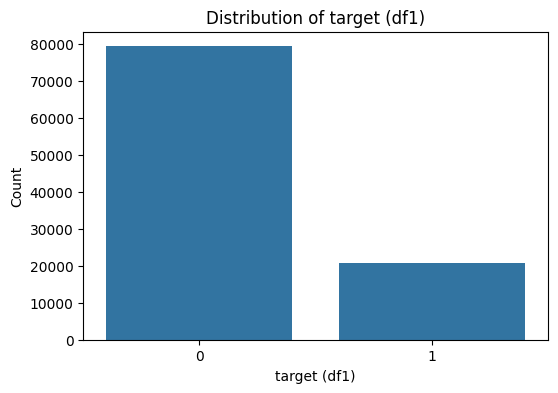


df2['target'] distribution:
target
1    320
0    200
Name: count, dtype: int64


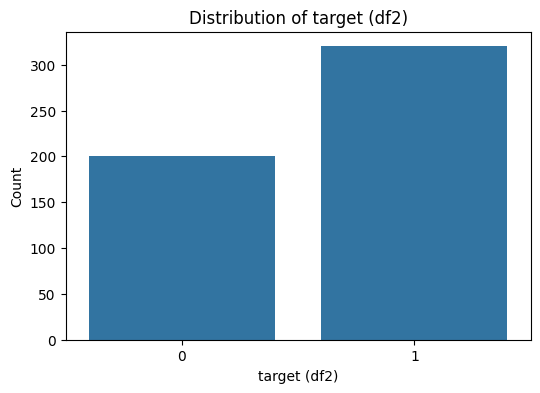


df3['target'] distribution:
target
0    500
1    268
Name: count, dtype: int64


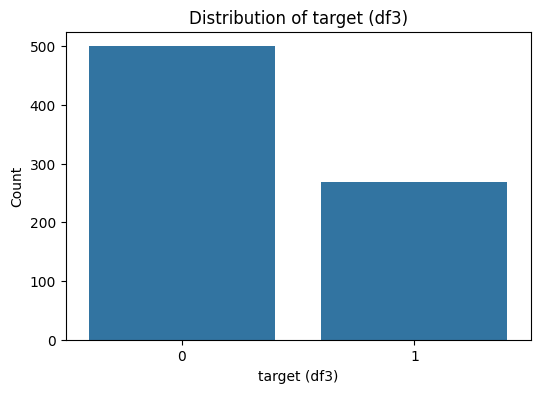

In [ ]:
def plot_distribution(series, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=series)
    plt.title(f"Distribution of {title}")
    plt.xlabel(title)
    plt.ylabel("Count")
    plt.show()

# 'target' in df1
print("df1['target'] distribution:")
print(df1['target'].value_counts())
plot_distribution(df1['target'], 'target (df1)')

# 'target' in df2
print("\ndf2['target'] distribution:")
print(df2['target'].value_counts())
plot_distribution(df2['target'], 'target (df2)')

#'target' in df3
print("\ndf3['target'] distribution:")
print(df3['target'].value_counts())
plot_distribution(df3['target'], 'target (df3)')


Correlation visualization

In [ ]:
ordinal_map = {'low': 0, 'moderate': 1, 'high': 2}

ordinal_cols = ['physical_activity_level']

for col in ordinal_cols:
    df1[col] = df1[col].map(ordinal_map)

In [ ]:
#correlation matrices
corr1 = df1.corr(numeric_only=True)
corr2 = df2.corr(numeric_only=True)
corr3 = df3.corr(numeric_only=True)

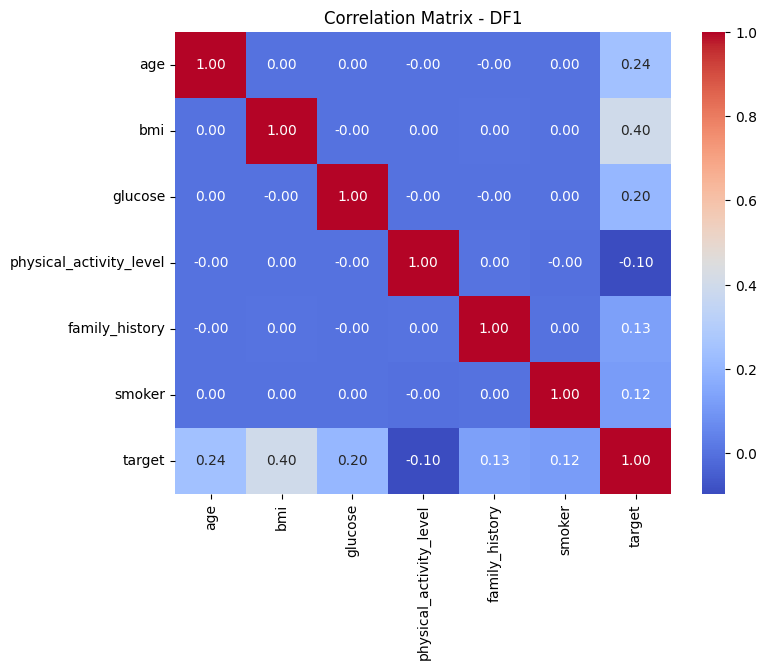

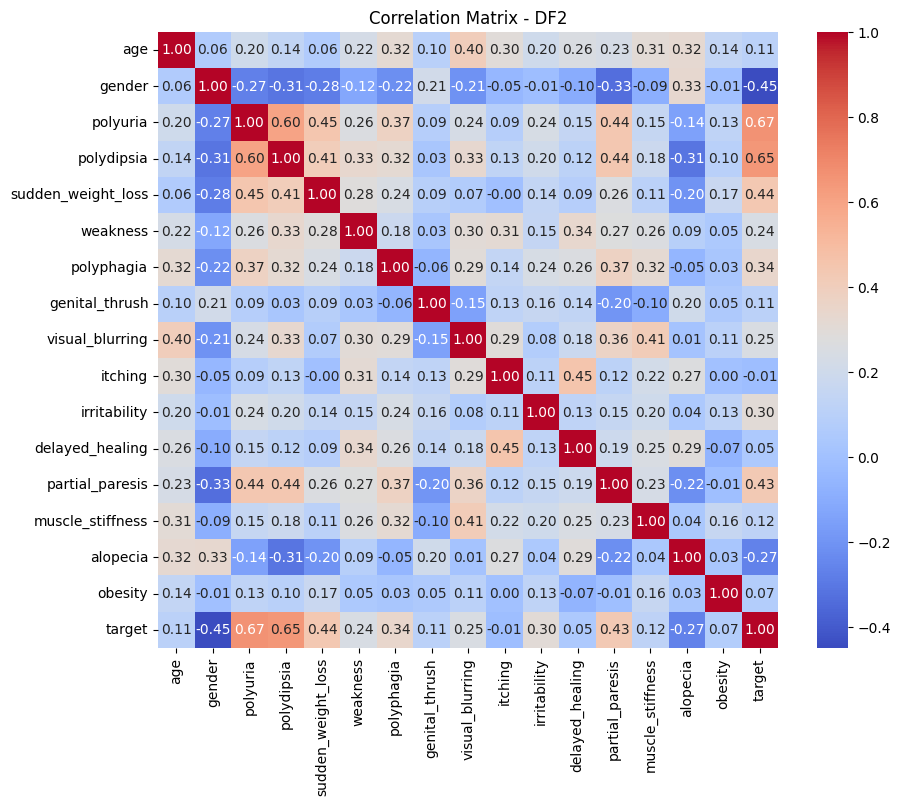

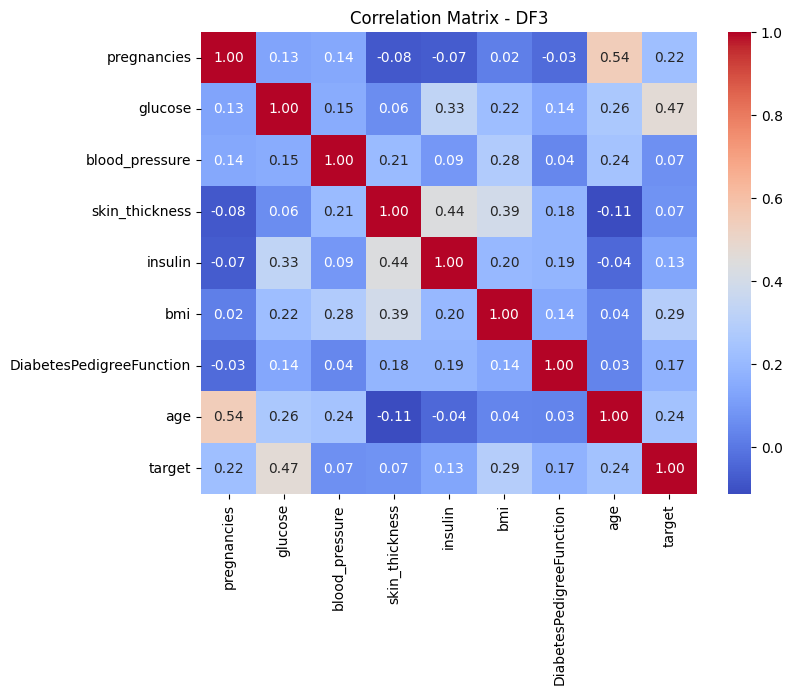

In [ ]:
#correlation matrix df1
plt.figure(figsize=(8,6))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - DF1')
plt.show()

#correlation matrix df2
plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - DF2')
plt.show()

#correlation matrix df3
plt.figure(figsize=(8,6))
sns.heatmap(corr3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - DF3')
plt.show()


Since DF1 is much bigger than DF2 and DF3, and DF2 has its own different features, we decided to merge all three into one dataset (DF4) before modeling, just to check the accuracy and results. At the same time, we’re keeping the original datasets separate to train models on each of them individually, then average their weights at the end. This way, each dataset keeps its unique features, and they all contribute equally to the final model, no matter their size (Ensamble Learning).

DF 4 THE MERGING

In [ ]:
# Copy the og dfs
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

# Rename columns for consistency
df1_copy = df1_copy.rename(columns={'glucose': 'glucose_level','at_risk_diabetes': 'target'})
df3_copy = df3_copy.rename(columns={
    'glucose': 'glucose_level',
    'bmi': 'bmi',
    'age': 'age'
})


In [ ]:
binary_cols = df2_copy.columns.drop(['age', 'gender', 'target'])

# Yes/No → 1/0
df2_copy[binary_cols] = df2_copy[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Gender mapping (optional: drop it later if not useful)
df2_copy['gender'] = df2_copy['gender'].map({'Male': 1, 'Female': 0})

# Target: Positive/Negative → 1/0
df2_copy['target'] = df2_copy['target'].map({'Positive': 1, 'Negative': 0})


In [ ]:
all_columns = set(df1_copy.columns).union(set(df2_copy.columns)).union(set(df3_copy.columns))

df1_copy = df1_copy.reindex(columns=all_columns)
df2_copy = df2_copy.reindex(columns=all_columns)
df3_copy = df3_copy.reindex(columns=all_columns)

# Combine into df4
df4 = pd.concat([df1_copy, df2_copy, df3_copy], ignore_index=True)


In [ ]:
# Check NAs
missing_info = df4.isna().sum()
print("Missing values per column:\n", missing_info[missing_info > 0])
# Drop columns missing in over 90% of the rows
threshold = 0.9 * len(df4)
df4 = df4.dropna(thresh=threshold, axis=1)
missing_info = df4.isna().sum()
print("Missing values per column AFTER:\n", missing_info[missing_info > 0])
#filling after drop
for col in ['family_history', 'target', 'smoker', 'physical_activity_level']:
    df4[col] = df4[col].fillna(df4[col].mode()[0])

# Fill numerical columns with mean
for col in ['bmi', 'glucose_level']:
    df4[col] = df4[col].fillna(df4[col].mean())

#last check
print("Missing values remaining:\n", df4.isna().sum())


Missing values per column:
 blood_pressure              100520
partial_paresis             101288
insulin                     100520
alopecia                    101288
physical_activity_level       1288
polydipsia                  101288
obesity                     101288
skin_thickness              100520
muscle_stiffness            101288
glucose_level                  520
bmi                            520
delayed_healing             101288
sudden_weight_loss          101288
DiabetesPedigreeFunction    100520
irritability                101288
gender                      101288
genital_thrush              101288
polyuria                    101288
itching                     101288
smoker                        1288
target                         520
family_history                1288
polyphagia                  101288
visual_blurring             101288
pregnancies                 100520
weakness                    101288
dtype: int64
Missing values per column AFTER:
 physical_activi

<ipython-input-18-c60327b3e8f6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = df4[col].fillna(df4[col].mode()[0])
<ipython-input-18-c60327b3e8f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = df4[col].fillna(df4[col].mean())


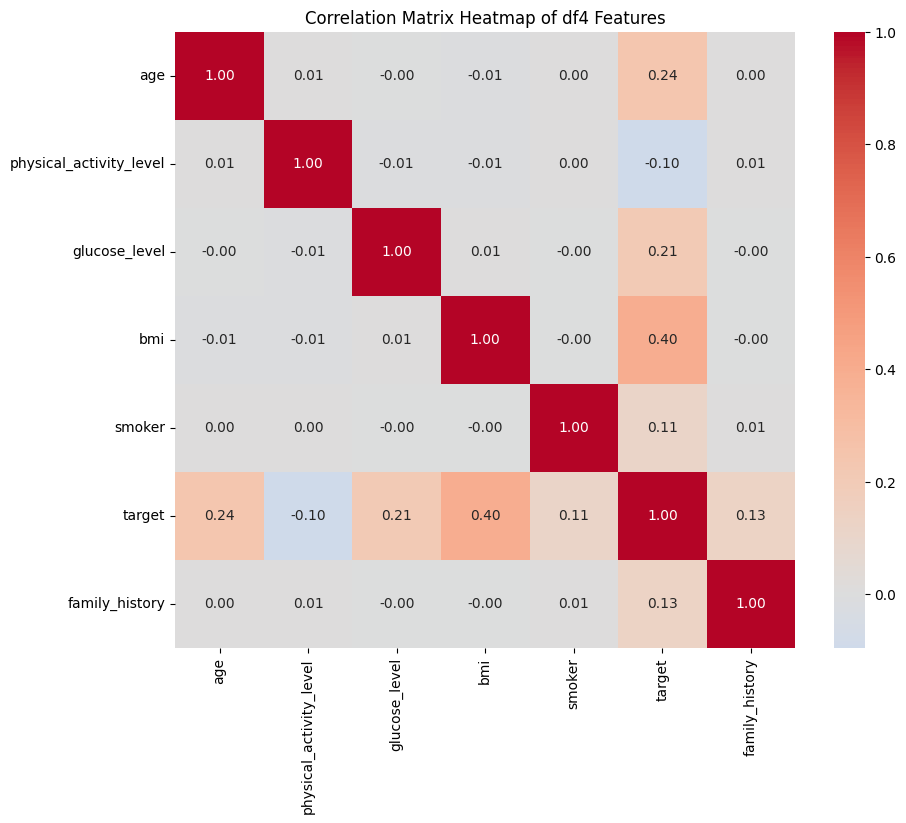

In [ ]:
corr_matrix = df4.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap of df4 Features")
plt.show()

In [ ]:
df4

,age,physical_activity_level,glucose_level,bmi,smoker,target,family_history
0,58,0.0,71.049867,33.154816,0.0,1.0,0.0
1,71,0.0,125.964887,26.786882,0.0,0.0,0.0
2,48,1.0,61.876196,20.977319,1.0,0.0,1.0
3,34,0.0,137.648074,27.959924,0.0,0.0,0.0
4,62,1.0,65.879564,28.304175,0.0,0.0,0.0
...,...,...,...,...,...,...,...
101283,63,0.0,101.000000,32.900000,0.0,0.0,0.0
101284,27,0.0,122.000000,36.800000,0.0,0.0,0.0
101285,30,0.0,121.000000,26.200000,0.0,0.0,0.0
101286,47,0.0,126.000000,30.100000,0.0,1.0,0.0


In [ ]:
X = df4.drop(columns=["target",'age'])
y = df4["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}
# Optional: XGBoost
models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))





Model: Logistic Regression
Accuracy: 0.8314
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     16068
         1.0       0.66      0.38      0.49      4190

    accuracy                           0.83     20258
   macro avg       0.76      0.67      0.69     20258
weighted avg       0.81      0.83      0.81     20258


Model: Random Forest
Accuracy: 0.8474
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     16068
         1.0       0.64      0.60      0.62      4190

    accuracy                           0.85     20258
   macro avg       0.77      0.75      0.76     20258
weighted avg       0.84      0.85      0.85     20258


Model: SVM
Accuracy: 0.8239
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90     16068
         1.0       0.72      0.25      0.37      419

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:38:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.8577
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     16068
         1.0       0.68      0.59      0.63      4190

    accuracy                           0.86     20258
   macro avg       0.79      0.76      0.77     20258
weighted avg       0.85      0.86      0.85     20258




Top Important Features for Random Forest:
                   Feature  Importance
2                      bmi    0.571125
1            glucose_level    0.372230
4           family_history    0.022239
3                   smoker    0.018058
0  physical_activity_level    0.016347


<ipython-input-26-d3de32b106ba>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


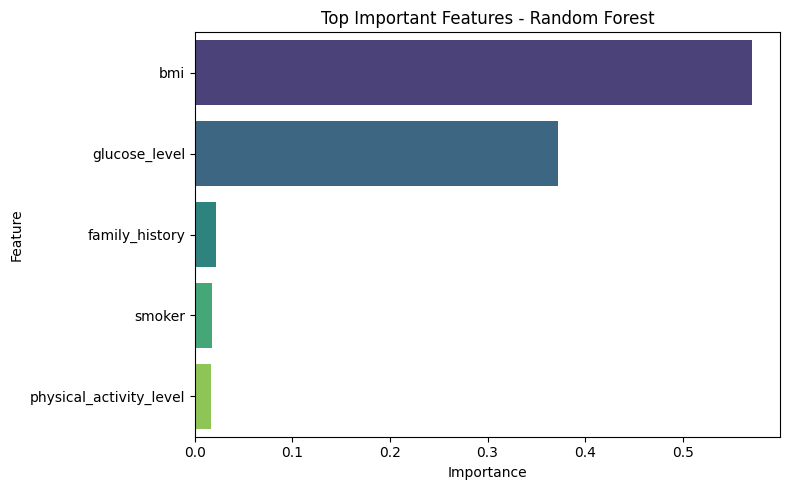


Top Important Features for Gradient Boosting:
                   Feature  Importance
2                      bmi    0.618589
1            glucose_level    0.255240
4           family_history    0.053199
3                   smoker    0.042894
0  physical_activity_level    0.030078


<ipython-input-26-d3de32b106ba>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


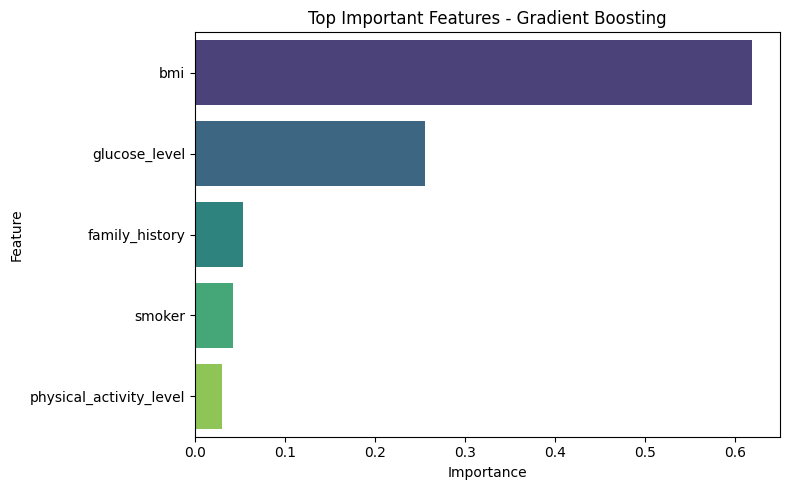


Top Important Features for Extra Trees:
                   Feature  Importance
2                      bmi    0.579419
1            glucose_level    0.375121
4           family_history    0.018017
3                   smoker    0.014091
0  physical_activity_level    0.013353


<ipython-input-26-d3de32b106ba>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


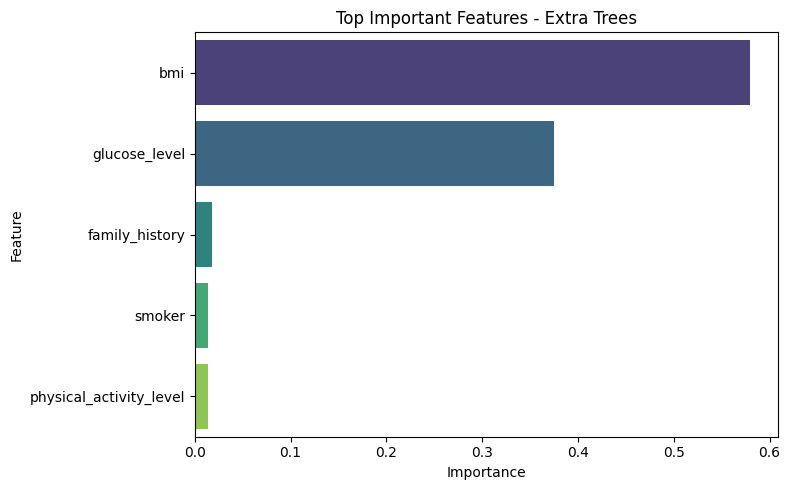


Top Important Features for XGBoost:
                   Feature  Importance
2                      bmi    0.293579
4           family_history    0.258079
3                   smoker    0.223285
1            glucose_level    0.147133
0  physical_activity_level    0.077925


<ipython-input-26-d3de32b106ba>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


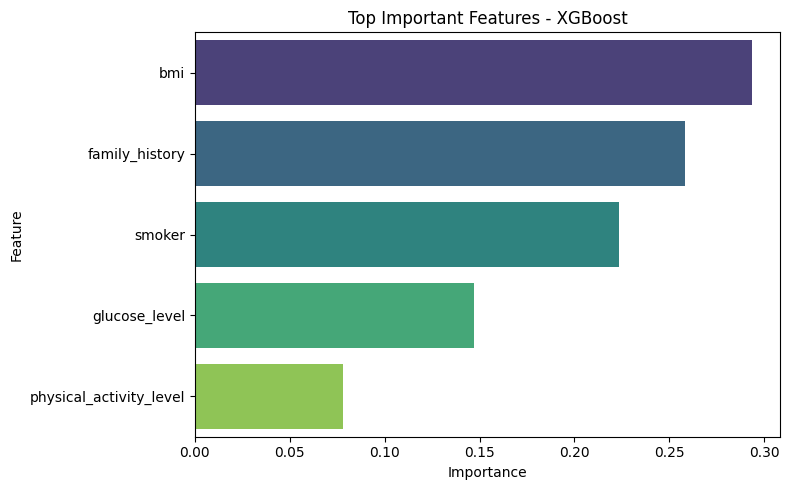

In [ ]:
from xgboost import XGBClassifier
xgb_available = True  # Optional, for future conditional logic

importance_models = ["Random Forest", "Gradient Boosting", "Extra Trees", "XGBoost"] if xgb_available else ["Random Forest", "Gradient Boosting", "Extra Trees"]

for name in importance_models:
    model = models[name]

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X.columns
        feature_importance_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False).head(10)

        print(f"\nTop Important Features for {name}:")
        print(feature_importance_df)

        # Optional: Plot
        plt.figure(figsize=(8, 5))
        sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
        plt.title(f"Top Important Features - {name}")
        plt.tight_layout()
        plt.show()


# **Logistic Regression (Manual using NumPy)**

In [ ]:
# Initialize weights and bias
W = np.zeros(X_train.shape[1])
b = 0
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training loop
for epoch in range(epochs):
    linear_model = np.dot(X_train, W) + b
    y_pred = sigmoid(linear_model)

    # Gradient calculation
    dw = (1 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))
    db = (1 / len(y_train)) * np.sum(y_pred - y_train)

    # Update weights
    W -= learning_rate * dw
    b -= learning_rate * db

# Prediction
log_preds = sigmoid(np.dot(X_test, W) + b) >= 0.5
log_accuracy = np.mean(log_preds == y_test)
print("Manual Logistic Regression Accuracy:", log_accuracy)

Manual Logistic Regression Accuracy: 0.7930200414651002


# Manual Naive Bayes (Gaussian NB)

In [ ]:
class ManualGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9  # add small value to avoid div by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                conditional = np.sum(np.log(self._pdf(c, x)))
                posterior = prior + conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)


In [ ]:
gnb = ManualGaussianNB()
gnb.fit(X_train.values, y_train.values)
y_pred_nb = gnb.predict(X_test.values)

accuracy_nb = np.mean(y_pred_nb == y_test.values)
print("Manual Gaussian Naive Bayes Accuracy:", accuracy_nb)

Manual Gaussian Naive Bayes Accuracy: 0.8340902359561655


# Keras **NN**

In [ ]:
# X: features, y: multi-class target
X = df4.drop(columns=["target"])
y = df4["target"]

# Encode target labels to integers if not already
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode target for Keras (multi-class classification)
y_categorical = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# NN Build
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
model.fit(X_train, y_train, epochs=11, batch_size=32, verbose=1)

#Evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report
accuracy = accuracy_score(y_true, y_pred)
print("Neural Network Accuracy:", accuracy)


Epoch 1/11


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2533/2533 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8510 - loss: 0.3315
Epoch 2/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2472
Epoch 3/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9021 - loss: 0.2349
Epoch 4/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9034 - loss: 0.2284
Epoch 5/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9078 - loss: 0.2234
Epoch 6/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9095 - loss: 0.2186
Epoch 7/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9108 - loss: 0.2149
Epoch 8/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9085 - loss: 0.2161
Epoch 9/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9089 - loss: 0.2155
Epoch 10/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9121 - loss: 0.2141
Epoch 11/11
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9129 - loss: 0.2119
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms

let's check every dataset alone


In [ ]:
df1.rename(columns={'glucose_level': 'glucose', 'bmi': 'bmi'}, inplace=True)
df3.rename(columns={'BMI': 'bmi', 'Glucose': 'glucose'}, inplace=True)



In [ ]:
X1 = df1.drop(columns=["target"])
y1 = df1["target"]

X2 = df2.drop(columns=["target"])
y2 = df2["target"]

X3 = df3.drop(columns=["target"])
y3 = df3["target"]

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
# Train and evaluate models
results = {}
trained_models_df1={}

for name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    acc1 = accuracy_score(y1_test, y1_pred)
    print("Dataset 1")
    print(f"\nModel : {name}")
    print(f"Accuracy: {acc1:.4f}")
    print("Classification Report:\n", classification_report(y1_test, y1_pred))

    trained_models_df1[name] = model

Dataset 1

Model : Logistic Regression
Accuracy: 0.8585
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     15888
           1       0.72      0.51      0.60      4112

    accuracy                           0.86     20000
   macro avg       0.80      0.73      0.75     20000
weighted avg       0.85      0.86      0.85     20000

Dataset 1

Model : Random Forest
Accuracy: 0.9119
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     15888
           1       0.81      0.75      0.78      4112

    accuracy                           0.91     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.91      0.91      0.91     20000

Dataset 1

Model : SVM
Accuracy: 0.8715
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     15888
           1       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Dataset 1

Model : XGBoost
Accuracy: 0.9164
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     15888
           1       0.81      0.77      0.79      4112

    accuracy                           0.92     20000
   macro avg       0.88      0.86      0.87     20000
weighted avg       0.92      0.92      0.92     20000



In [ ]:
# Train and evaluate models
results = {}
trained_models_df2={}

for name, model in models.items():
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    acc2 = accuracy_score(y2_test, y2_pred)
    print("Dataset 2")
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc2:.4f}")
    print("Classification Report:\n", classification_report(y2_test, y2_pred))

    trained_models_df2[name] = model

Dataset 2

Model: Logistic Regression
Accuracy: 0.9231
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

Dataset 2

Model: Random Forest
Accuracy: 0.9904
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Dataset 2

Model: SVM
Accuracy: 0.6827
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dataset 2

Model: Gradient Boosting
Accuracy: 0.9712
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

Dataset 2

Model: Decision Tree
Accuracy: 0.9519
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Dataset 2

Model: Extra Trees
Accuracy: 0.9904
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Train and evaluate models
results = {}
trained_models_df3={}
for name, model in models.items():
    model.fit(X3_train, y3_train)
    y3_pred = model.predict(X3_test)
    acc3 = accuracy_score(y3_test, y3_pred)
    print("Dataset 3")
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc3:.4f}")
    print("Classification Report:\n", classification_report(y3_test, y3_pred))

    trained_models_df3[name] = model



Dataset 3

Model: Logistic Regression
Accuracy: 0.7468
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Dataset 3

Model: Random Forest
Accuracy: 0.7208
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Dataset 3

Model: SVM
Accuracy: 0.7662
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.7

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



# **TRYING TRANSFER LEARNING**

In [ ]:
# Prepare df1
df1_features = ['age', 'bmi', 'glucose', 'physical_activity_level', 'family_history', 'smoker']
X1 = df1[df1_features]
y1 = df1['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Prepare df2
df2_features = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
X2 = df2[df2_features]
y2 = df2['target']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale features
scaler_df1 = StandardScaler()
X1_train = scaler_df1.fit_transform(X1_train)
X1_test = scaler_df1.transform(X1_test)

scaler_df2 = StandardScaler()
X2_train = scaler_df2.fit_transform(X2_train)
X2_test = scaler_df2.transform(X2_test)

# Convert to tensors to avoid retracing
X1_test_tensor = tf.convert_to_tensor(X1_test, dtype=tf.float32)
X2_test_tensor = tf.convert_to_tensor(X2_test, dtype=tf.float32)

#Model 1: Transfer Learning
model_base = Sequential([
    Input(shape=(len(df1_features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid', use_bias=False)
])
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Pre-train on df1
model_base.fit(X1_train, y1_train, epochs=12, batch_size=32, validation_split=0.2, verbose=1)

# Model for df2
model_df2_transfer = Sequential([
    Input(shape=(len(df2_features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid', use_bias=False)
])

# Transfer weights
model_df2_transfer.layers[1].set_weights(model_base.layers[1].get_weights())
model_df2_transfer.layers[2].set_weights(model_base.layers[2].get_weights())

# Freeze transferred layers
model_df2_transfer.layers[1].trainable = False
model_df2_transfer.layers[2].trainable = False

# Compile and fine-tune on df2
model_df2_transfer.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_df2_transfer.fit(X2_train, y2_train, epochs=12, batch_size=16, validation_split=0.2, verbose=1)

# Predict with transfer model
y2_pred_transfer_proba = model_df2_transfer.predict(X2_test_tensor)
y2_pred_transfer = (y2_pred_transfer_proba > 0.5).astype(int).flatten()
acc_transfer_df2 = accuracy_score(y2_test, y2_pred_transfer)

# Evaluate transfer model
print("\n📊 Neural Network with Transfer Learning (Pre-trained on df1, Fine-tuned on df2):")
print(f"Accuracy on df2 test set: {acc_transfer_df2:.4f}")
print("Classification Report on df2:\n", classification_report(y2_test, y2_pred_transfer))

# Evaluate on df1 test set (base model)
y1_pred_transfer_proba = model_base.predict(X1_test_tensor)
y1_pred_transfer = (y1_pred_transfer_proba > 0.5).astype(int).flatten()
acc_transfer_df1 = accuracy_score(y1_test, y1_pred_transfer)
print("\n📊 Evaluation on df1 test set (Transfer Learning Base Model):")
print(f"Accuracy: {acc_transfer_df1:.4f}")
print("Classification Report on df1:\n", classification_report(y1_test, y1_pred_transfer))

#Model 2: No Transfer Learning
model_df2_no_transfer = Sequential([
    Input(shape=(len(df2_features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid', use_bias=False)
])
model_df2_no_transfer.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train on df2
model_df2_no_transfer.fit(X2_train, y2_train, epochs=12, batch_size=16, validation_split=0.2, verbose=1)

# Predict with no-transfer model
y2_pred_no_transfer_proba = model_df2_no_transfer.predict(X2_test_tensor)
y2_pred_no_transfer = (y2_pred_no_transfer_proba > 0.5).astype(int).flatten()
acc_no_transfer_df2 = accuracy_score(y2_test, y2_pred_no_transfer)

# Evaluate no-transfer model
print("\n📊 Neural Network without Transfer Learning (Trained on df2):")
print(f"Accuracy on df2 test set: {acc_no_transfer_df2:.4f}")
print("Classification Report on df2:\n", classification_report(y2_test, y2_pred_no_transfer))

# Comparison
print("\n📊 Comparison:")
print(f"Transfer Learning Accuracy (df2 test set): {acc_transfer_df2:.4f}")
print(f"No Transfer Learning Accuracy (df2 test set): {acc_no_transfer_df2:.4f}")

Epoch 1/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8593 - loss: 0.3338 - val_accuracy: 0.8984 - val_loss: 0.2508
Epoch 2/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8949 - loss: 0.2500 - val_accuracy: 0.9026 - val_loss: 0.2381
Epoch 3/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.9015 - loss: 0.2375 - val_accuracy: 0.9041 - val_loss: 0.2273
Epoch 4/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9048 - loss: 0.2277 - val_accuracy: 0.9069 - val_loss: 0.2248
Epoch 5/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9067 - loss: 0.2239 - val_accuracy: 0.9095 - val_loss: 0.2158
Epoch 6/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9068 - loss: 0.2224 - val_accuracy: 0.9101 - val_loss: 0.2180
Epoch 7/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9089 - loss: 0.2182 - val_accuracy: 0.9114 - val_loss: 0.2102
Epoch 8/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9105 - loss: 0.2127

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Evaluation on df1 test set (Transfer Learning Base Model):
Accuracy: 0.9141
Classification Report on df1:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     15888
           1       0.80      0.78      0.79      4112

    accuracy                           0.91     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.91      0.91      0.91     20000

Epoch 1/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4618 - loss: 0.7704 - val_accuracy: 0.7738 - val_loss: 0.5585
Epoch 2/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8240 - loss: 0.5231 - val_accuracy: 0.8810 - val_loss: 0.3934
Epoch 3/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8953 - loss: 0.3758 - val_accuracy: 0.9048 - val_loss: 0.2846
Epoch 4/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9236 - loss: 0.2888 - val_accuracy: 0.9167 - val_loss: 0.2207
Epoch 5/12
21/2

# COMPARING BETWEEN SHARED EQUAL WEIGHTS AND IF WE USED THE MERGED DATASET
** Multi-Input Neural Network (Early Fusion)**

In [ ]:
# Sample equal-sized subsets from each dataset
min_samples = min(len(df1), len(df2), len(df3))  # e.g., 416
df1_sampled = df1.sample(n=min_samples, random_state=42).reset_index(drop=True)
df2_sampled = df2.sample(n=min_samples, random_state=42).reset_index(drop=True)
df3_sampled = df3.sample(n=min_samples, random_state=42).reset_index(drop=True)

# Prepare features and target
X1 = df1_sampled.drop(columns=['target']).values
X2 = df2_sampled.drop(columns=['target']).values
X3 = df3_sampled.drop(columns=['target']).values
y = df1_sampled['target'].values  # Use 'diabetes' from df1 as target

# Split data consistently
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, y_train, y_test = train_test_split(
    X1, X2, X3, y, test_size=0.2, random_state=42
)

# Verify shapes
print("X1_train shape:", X1_train.shape)
print("X2_train shape:", X2_train.shape)
print("X3_train shape:", X3_train.shape)
print("y_train shape:", y_train.shape)

# Define input layers
input1 = Input(shape=(X1_train.shape[1],))  # 6 features
input2 = Input(shape=(X2_train.shape[1],))  # 16 features
input3 = Input(shape=(X3_train.shape[1],))  # 8 features

# Project each input to a common feature dimension
projection_dim = 32
x1 = Dense(projection_dim, activation='relu', name='project_1')(input1)
x2 = Dense(projection_dim, activation='relu', name='project_2')(input2)
x3 = Dense(projection_dim, activation='relu', name='project_3')(input3)

# Shared dense layer for all projected inputs
shared_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.01), name='shared_dense')

# Apply shared dense layer
x1 = shared_dense(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

x2 = shared_dense(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.4)(x2)

x3 = shared_dense(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.4)(x3)

# Concatenate the outputs
merged = concatenate([x1, x2, x3], name='concatenate')

# Additional dense layers
x = Dense(128, activation='relu', name='dense_1')(merged)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', name='dense_2')(x)
x = Dropout(0.4)(x)

# Output layer
output = Dense(1, activation='sigmoid', name='output')(x)

# Create and compile the model
model = Model(inputs=[input1, input2, input3], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train the model
history = model.fit(
    [X1_train, X2_train, X3_train], y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Print training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate([X1_test, X2_test, X3_test], y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

X1_train shape: (416, 6)
X2_train shape: (416, 16)
X3_train shape: (416, 8)
y_train shape: (416,)
Epoch 1/20
11/11 - 7s - 592ms/step - accuracy: 0.7590 - loss: 1.1119 - val_accuracy: 0.7262 - val_loss: 1.0415 - learning_rate: 1.0000e-03
Epoch 2/20
11/11 - 1s - 65ms/step - accuracy: 0.7892 - loss: 0.9363 - val_accuracy: 0.2738 - val_loss: 1.8749 - learning_rate: 1.0000e-03
Epoch 3/20
11/11 - 0s - 39ms/step - accuracy: 0.8042 - loss: 0.8912 - val_accuracy: 0.3929 - val_loss: 1.5656 - learning_rate: 1.0000e-03
Epoch 4/20
11/11 - 1s - 62ms/step - accuracy: 0.8012 - loss: 0.8472 - val_accuracy: 0.2857 - val_loss: 1.6711 - learning_rate: 1.0000e-03
Epoch 5/20
11/11 - 1s - 52ms/step - accuracy: 0.8042 - loss: 0.8463 - val_accuracy: 0.2738 - val_loss: 1.6200 - learning_rate: 5.0000e-04
Epoch 6/20
11/11 - 1s - 51ms/step - accuracy: 0.8133 - loss: 0.7986 - val_accuracy: 0.2976 - val_loss: 1.6110 - learning_rate: 5.0000e-04
Training Accuracy: 0.8133
Validation Accuracy: 0.2976
4/4 - 0s - 22ms/ste

# **Changing Ratio to 50 25 25**
**Weighted Feature-Level Fusion in a Multi-Input Neural Network**

In [45]:

min_samples = min(len(df1), len(df2), len(df3))  # e.g., 416
df1_sampled = df1.sample(n=min_samples, random_state=42).reset_index(drop=True)
df2_sampled = df2.sample(n=min_samples, random_state=42).reset_index(drop=True)
df3_sampled = df3.sample(n=min_samples, random_state=42).reset_index(drop=True)

# Prepare features and target
X1 = df1_sampled.drop(columns=['target']).values
X2 = df2_sampled.drop(columns=['target']).values
X3 = df3_sampled.drop(columns=['target']).values
y = df1_sampled['target'].values  # Use 'diabetes' from df1 as target

# Split data consistently
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, y_train, y_test = train_test_split(
    X1, X2, X3, y, test_size=0.2, random_state=42
)

# Input layers
input1 = Input(shape=(X1_train.shape[1],))  # 6 features
input2 = Input(shape=(X2_train.shape[1],))  # 16 features
input3 = Input(shape=(X3_train.shape[1],))  # 8 features

# Project each input to a common feature dimension
projection_dim = 32
x1 = Dense(projection_dim, activation='relu', name='project_1')(input1)
x2 = Dense(projection_dim, activation='relu', name='project_2')(input2)
x3 = Dense(projection_dim, activation='relu', name='project_3')(input3)

# Shared dense layer
shared_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.01), name='shared_dense')

x1 = shared_dense(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

x2 = shared_dense(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.4)(x2)

x3 = shared_dense(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.4)(x3)

# Apply manual weights to each representation
x1 = Lambda(lambda x: x * 0.5, name='weight_x1_50')(x1)   # 50%
x2 = Lambda(lambda x: x * 0.25, name='weight_x2_25')(x2)  # 25%
x3 = Lambda(lambda x: x * 0.25, name='weight_x3_25')(x3)  # 25%

# Concatenate the weighted outputs
merged = concatenate([x1, x2, x3], name='concatenate_weighted')

# Final dense layers
x = Dense(128, activation='relu', name='dense_1')(merged)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', name='dense_2')(x)
x = Dropout(0.4)(x)

# Output layer
output = Dense(1, activation='sigmoid', name='output')(x)

# Create and compile the model
model = Model(inputs=[input1, input2, input3], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and LR scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train the model
history = model.fit(
    [X1_train, X2_train, X3_train], y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Print training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate([X1_test, X2_test, X3_test], y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
11/11 - 5s - 485ms/step - accuracy: 0.6295 - loss: 1.1467 - val_accuracy: 0.7024 - val_loss: 1.0788 - learning_rate: 1.0000e-03
Epoch 2/20
11/11 - 0s - 15ms/step - accuracy: 0.8012 - loss: 0.9509 - val_accuracy: 0.7024 - val_loss: 1.0014 - learning_rate: 1.0000e-03
Epoch 3/20
11/11 - 0s - 30ms/step - accuracy: 0.8042 - loss: 0.9132 - val_accuracy: 0.4048 - val_loss: 1.2288 - learning_rate: 1.0000e-03
Epoch 4/20
11/11 - 0s - 24ms/step - accuracy: 0.7982 - loss: 0.8346 - val_accuracy: 0.2500 - val_loss: 1.4043 - learning_rate: 1.0000e-03
Epoch 5/20
11/11 - 0s - 15ms/step - accuracy: 0.8163 - loss: 0.7786 - val_accuracy: 0.2262 - val_loss: 1.5786 - learning_rate: 1.0000e-03
Epoch 6/20
11/11 - 0s - 14ms/step - accuracy: 0.8343 - loss: 0.7308 - val_accuracy: 0.2857 - val_loss: 1.3849 - learning_rate: 5.0000e-04
Epoch 7/20
11/11 - 0s - 28ms/step - accuracy: 0.8253 - loss: 0.7178 - val_accuracy: 0.3929 - val_loss: 1.2663 - learning_rate: 5.0000e-04
Training Accuracy: 0.8253
Validat

**# Changing Ratio to 70 15 15**
**Weighted Feature-Level Fusion in a Multi-Input Neural Network**

In [47]:

min_samples = min(len(df1), len(df2), len(df3))  # e.g., 416
df1_sampled = df1.sample(n=min_samples, random_state=42).reset_index(drop=True)
df2_sampled = df2.sample(n=min_samples, random_state=42).reset_index(drop=True)
df3_sampled = df3.sample(n=min_samples, random_state=42).reset_index(drop=True)

# Prepare features and target
X1 = df1_sampled.drop(columns=['target']).values
X2 = df2_sampled.drop(columns=['target']).values
X3 = df3_sampled.drop(columns=['target']).values
y = df1_sampled['target'].values  # Use 'diabetes' from df1 as target

# Split data consistently
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, y_train, y_test = train_test_split(
    X1, X2, X3, y, test_size=0.2, random_state=42
)

# Input layers
input1 = Input(shape=(X1_train.shape[1],))  # 6 features
input2 = Input(shape=(X2_train.shape[1],))  # 16 features
input3 = Input(shape=(X3_train.shape[1],))  # 8 features

# Project each input to a common feature dimension
projection_dim = 32
x1 = Dense(projection_dim, activation='relu', name='project_1')(input1)
x2 = Dense(projection_dim, activation='relu', name='project_2')(input2)
x3 = Dense(projection_dim, activation='relu', name='project_3')(input3)

# Shared dense layer
shared_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.01), name='shared_dense')

x1 = shared_dense(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

x2 = shared_dense(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.4)(x2)

x3 = shared_dense(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.4)(x3)

# Apply manual weights to each representation
x1 = Lambda(lambda x: x * 0.7, name='weight_x1_50')(x1)   # 70%
x2 = Lambda(lambda x: x * 0.15, name='weight_x2_25')(x2)  # 15%
x3 = Lambda(lambda x: x * 0.15, name='weight_x3_25')(x3)  # 15%

# Concatenate the weighted outputs
merged = concatenate([x1, x2, x3], name='concatenate_weighted')

# Final dense layers
x = Dense(128, activation='relu', name='dense_1')(merged)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', name='dense_2')(x)
x = Dropout(0.4)(x)

# Output layer
output = Dense(1, activation='sigmoid', name='output')(x)

# Create and compile the model
model = Model(inputs=[input1, input2, input3], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and LR scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train the model
history = model.fit(
    [X1_train, X2_train, X3_train], y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Print training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate([X1_test, X2_test, X3_test], y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
11/11 - 11s - 966ms/step - accuracy: 0.7681 - loss: 1.0806 - val_accuracy: 0.8452 - val_loss: 1.0028 - learning_rate: 1.0000e-03
Epoch 2/20
11/11 - 0s - 14ms/step - accuracy: 0.7982 - loss: 0.9447 - val_accuracy: 0.2024 - val_loss: 1.3202 - learning_rate: 1.0000e-03
Epoch 3/20
11/11 - 0s - 14ms/step - accuracy: 0.7922 - loss: 0.8893 - val_accuracy: 0.1667 - val_loss: 1.6501 - learning_rate: 1.0000e-03
Epoch 4/20
11/11 - 0s - 14ms/step - accuracy: 0.8102 - loss: 0.8260 - val_accuracy: 0.1548 - val_loss: 1.7074 - learning_rate: 1.0000e-03
Epoch 5/20
11/11 - 0s - 17ms/step - accuracy: 0.8343 - loss: 0.7621 - val_accuracy: 0.1667 - val_loss: 1.4657 - learning_rate: 5.0000e-04
Epoch 6/20
11/11 - 0s - 14ms/step - accuracy: 0.8253 - loss: 0.7629 - val_accuracy: 0.1667 - val_loss: 1.4461 - learning_rate: 5.0000e-04
Training Accuracy: 0.8253
Validation Accuracy: 0.1667
4/4 - 0s - 16ms/step - accuracy: 0.7885 - loss: 1.0304
Test Accuracy: 0.7885


In [ ]:
input1 = Input(shape=(df4.shape[1] - 1,))  # Exclude the target column from the input shape

# Shared Dense layer with L2 regularization
x1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

# Add more dense layers
x = Dense(128, activation='relu')(x1)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

# Create and compile the model
model = Model(inputs=[input1], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Prepare the features and target for training
X_train = df4.drop(columns='target')  # Exclude the target column from features
y_train = df4['target']  # The target column
X_test = df4.drop(columns='target')  # Exclude the target column from features
y_test = df4['target']  # The target column

# Train the model with validation and early stopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Print training and validation accuracy after training
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(None, 6))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(None, 6))
  warnings.warn(msg)


2533/2533 - 15s - 6ms/step - accuracy: 0.8435 - loss: 0.3849 - val_accuracy: 0.8092 - val_loss: 0.5066 - learning_rate: 1.0000e-03
Epoch 2/20
2533/2533 - 10s - 4ms/step - accuracy: 0.8582 - loss: 0.3423 - val_accuracy: 0.8761 - val_loss: 0.3123 - learning_rate: 1.0000e-03
Epoch 3/20
2533/2533 - 15s - 6ms/step - accuracy: 0.8635 - loss: 0.3291 - val_accuracy: 0.8564 - val_loss: 0.3223 - learning_rate: 1.0000e-03
Epoch 4/20
2533/2533 - 13s - 5ms/step - accuracy: 0.8635 - loss: 0.3295 - val_accuracy: 0.8183 - val_loss: 0.4582 - learning_rate: 1.0000e-03
Epoch 5/20
2533/2533 - 17s - 7ms/step - accuracy: 0.8659 - loss: 0.3226 - val_accuracy: 0.8525 - val_loss: 0.3284 - learning_rate: 1.0000e-03
Epoch 6/20
2533/2533 - 10s - 4ms/step - accuracy: 0.8701 - loss: 0.3099 - val_accuracy: 0.8716 - val_loss: 0.2886 - learning_rate: 5.0000e-04
Epoch 7/20
2533/2533 - 10s - 4ms/step - accuracy: 0.8694 - loss: 0.3130 - val_accuracy: 0.8759 - val_loss: 0.2926 - learning_rate: 5.0000e-04
Epoch 8/20
2533/2

# **ENSAMBLE LEARNING**

In [50]:

def create_model(input_dim):
    # Wrap the input dimension in a tuple
    inp = Input(shape=(input_dim,))
    x = Dense(32, activation='relu')(inp)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train separate models
model1 = create_model(X1_train.shape[1])
model2 = create_model(X2_train.shape[1])
model3 = create_model(X3_train.shape[1])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)
]

history1 = model1.fit(X1_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=2)
history2 = model2.fit(X2_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=2)
history3 = model3.fit(X3_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=2)

# Predict on test data separately
pred1 = model1.predict(X1_test)
pred2 = model2.predict(X2_test)
pred3 = model3.predict(X3_test)

# Weighted average of predictions: 50% for model1, 25% for model2 and model3
ensemble_pred = 0.5 * pred1 + 0.25 * pred2 + 0.25 * pred3

# Convert to binary labels (threshold 0.5)
ensemble_labels = (ensemble_pred > 0.5).astype(int)

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_labels)

Epoch 1/20
11/11 - 5s - 424ms/step - accuracy: 0.4578 - loss: 0.9241 - val_accuracy: 0.1548 - val_loss: 3.5802 - learning_rate: 1.0000e-03
Epoch 2/20
11/11 - 0s - 16ms/step - accuracy: 0.6928 - loss: 0.6065 - val_accuracy: 0.1548 - val_loss: 3.4978 - learning_rate: 1.0000e-03
Epoch 3/20
11/11 - 0s - 14ms/step - accuracy: 0.7440 - loss: 0.5366 - val_accuracy: 0.1548 - val_loss: 2.7828 - learning_rate: 1.0000e-03
Epoch 4/20
11/11 - 0s - 13ms/step - accuracy: 0.7892 - loss: 0.4977 - val_accuracy: 0.1667 - val_loss: 2.0252 - learning_rate: 1.0000e-03
Epoch 5/20
11/11 - 0s - 13ms/step - accuracy: 0.8133 - loss: 0.4748 - val_accuracy: 0.1667 - val_loss: 2.0962 - learning_rate: 1.0000e-03
Epoch 6/20
11/11 - 0s - 13ms/step - accuracy: 0.7771 - loss: 0.4735 - val_accuracy: 0.1548 - val_loss: 2.3178 - learning_rate: 1.0000e-03
Epoch 7/20
11/11 - 0s - 27ms/step - accuracy: 0.8404 - loss: 0.3938 - val_accuracy: 0.1548 - val_loss: 2.5953 - learning_rate: 1.0000e-03
Epoch 8/20
11/11 - 0s - 16ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


# Examining which subgroup of age and gender the model determines the best

In [ ]:

data = df4
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 100], labels=['Young', 'Older'])

# Define features and target
X = data[['age', 'physical_activity_level', 'glucose_level', 'bmi', 'smoker', 'family_history']]
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost model
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Function to evaluate model performance for a subgroup
def evaluate_subgroup_performance(data, subgroup_value, X_test, y_test, model, subgroup_column):
    # Filter test data for the subgroup
    mask = data[subgroup_column] == subgroup_value
    X_subgroup = X_test[mask]
    y_subgroup = y_test[mask]

    if len(y_subgroup) == 0:  # Skip if empty
        return None

    # Predict and calculate metrics
    y_pred = model.predict(X_subgroup)
    metrics = {
        'Subgroup': f"{subgroup_column}: {subgroup_value}",
        'Accuracy': accuracy_score(y_subgroup, y_pred),
        'Precision': precision_score(y_subgroup, y_pred, zero_division=0),
        'Recall': recall_score(y_subgroup, y_pred, zero_division=0),
        'F1-Score': f1_score(y_subgroup, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_subgroup, model.predict_proba(X_subgroup)[:, 1]) if len(np.unique(y_subgroup)) > 1 else 0,
        'Sample_Size': len(y_subgroup)
    }
    return metrics

# Evaluate performance for each subgroup (age_group, family_history, smoker)
subgroup_columns = ['age_group', 'family_history', 'smoker']
results = []
for col in subgroup_columns:
    subgroups = data[col].unique()
    for subgroup in subgroups:
        metrics = evaluate_subgroup_performance(data.loc[X_test.index], subgroup, X_test, y_test, model, col)
        if metrics:
            results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Identify subgroup with highest accuracy
best_subgroup = results_df.loc[results_df['Accuracy'].idxmax()]

# Print results
print("Model Performance by Subgroup (XGBoost):")
print(results_df)
print("\nSubgroup with Highest Accuracy:")
print(best_subgroup)

# Create a bar chart for accuracy by subgroup
chart_data = {
    "type": "bar",
    "data": {
        "labels": results_df['Subgroup'].tolist(),
        "datasets": [{
            "label": "Accuracy",
            "data": results_df['Accuracy'].tolist(),
            "backgroundColor": ["#36A2EB", "#FF6384", "#FFCE56", "#4BC0C0", "#9966FF", "#FF9F40"],
            "borderColor": ["#2A8ABF", "#D63D5A", "#D6A73D", "#3A9A9A", "#7A52CC", "#D68A30"],
            "borderWidth": 1
        }]
    },
    "options": {
        "scales": {
            "y": {
                "beginAtZero": True,
                "title": {
                    "display": True,
                    "text": "Accuracy"
                }
            },
            "x": {
                "title": {
                    "display": True,
                    "text": "Subgroup"
                }
            }
        },
        "plugins": {
            "legend": {
                "display": False
            },
            "title": {
                "display": True,
                "text": "XGBoost Model Accuracy by Age Group, Family History, and Smoker Status"
            }
        }
    }
}

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Model Performance by Subgroup (XGBoost):
              Subgroup  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0     age_group: Older  0.911123   0.816491  0.771424  0.793318  0.956371   
1     age_group: Young  0.933914   0.704082  0.484211  0.573805  0.943464   
2  family_history: 0.0  0.926338   0.796717  0.776119  0.786283  0.961413   
3  family_history: 1.0  0.882320   0.838911  0.732658  0.782193  0.939567   
4          smoker: 0.0  0.920123   0.795492  0.759301  0.776975  0.958380   
5          smoker: 1.0  0.886533   0.857666  0.756466  0.803894  0.944065   

   Sample_Size  
0        27285  
1         3102  
2        21490  
3         8897  
4        24350  
5         6037  

Subgroup with Highest Accuracy:
Subgroup       age_group: Young
Accuracy               0.933914
Precision              0.704082
Recall                 0.484211
F1-Score               0.573805
ROC-AUC                0.943464
Sample_Size                3102
Name: 1, dtype: object

Feature Importance:

Determine which BMI and Glucose level are the dangerous


Statistics for BMI and Glucose Levels in At-Risk Individuals:
                bmi  glucose_level
count  20999.000000   20999.000000
mean      30.934632     112.646903
std        4.715067      33.116275
min        0.000000       0.000000
25%       29.483400      86.057474
50%       31.476820     110.605140
75%       33.684821     141.929249
max       67.100000     200.000000

Statistics for BMI and Glucose Levels in Not At-Risk Individuals:
                bmi  glucose_level
count  80289.000000   80289.000000
mean      26.061505      98.488433
std        4.550225      25.187428
min        0.000000       0.000000
25%       23.105489      78.734544
50%       26.158989      98.365272
75%       28.838986     116.699490
max       57.300000     200.000000

Suggested Dangerous Thresholds (75th Percentile of At-Risk Group):
BMI: >33.68
Glucose Level: >141.93 mg/dL

Medical Guideline Thresholds for Reference:
BMI: ≥30 (Obese)
Glucose: 100–125 mg/dL (Prediabetes), ≥126 mg/dL (Diabetes)

Feature 

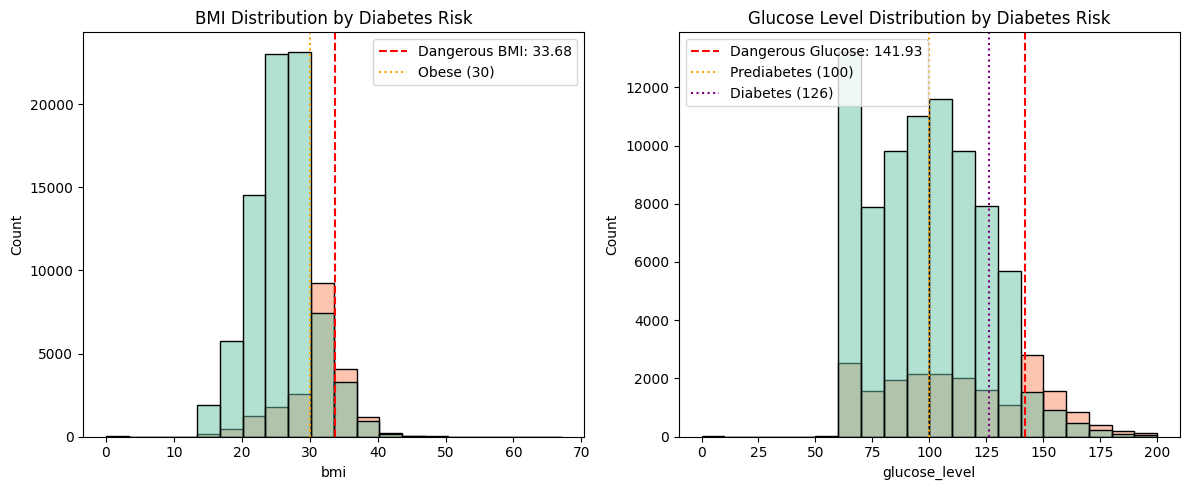

In [ ]:
data = df4
at_risk_data = data[data['target'] == 1]
not_at_risk_data = data[data['target'] == 0]

print("\nStatistics for BMI and Glucose Levels in At-Risk Individuals:")
print(at_risk_data[['bmi', 'glucose_level']].describe())

print("\nStatistics for BMI and Glucose Levels in Not At-Risk Individuals:")
print(not_at_risk_data[['bmi', 'glucose_level']].describe())

# Define dangerous thresholds (75th percentile of at-risk group)
bmi_threshold = at_risk_data['bmi'].quantile(0.75)
glucose_threshold = at_risk_data['glucose_level'].quantile(0.75)
print(f"\nSuggested Dangerous Thresholds (75th Percentile of At-Risk Group):")
print(f"BMI: >{bmi_threshold:.2f}")
print(f"Glucose Level: >{glucose_threshold:.2f} mg/dL")

# Medical guideline thresholds
print("\nMedical Guideline Thresholds for Reference:")
print("BMI: ≥30 (Obese)")
print("Glucose: 100–125 mg/dL (Prediabetes), ≥126 mg/dL (Diabetes)")

# Train XGBoost to confirm feature importance of BMI and glucose
X = data[['age', 'physical_activity_level', 'glucose_level', 'bmi', 'smoker', 'family_history']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Predicting Diabetes Risk:")
print(feature_importance[['Feature', 'Importance']][feature_importance['Feature'].isin(['bmi', 'glucose_level'])])

# Create visualizations
# Histogram for BMI and Glucose Levels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='bmi', hue='target', bins=20, palette='Set2')
plt.axvline(bmi_threshold, color='red', linestyle='--', label=f'Dangerous BMI: {bmi_threshold:.2f}')
plt.axvline(30, color='orange', linestyle=':', label='Obese (30)')
plt.title('BMI Distribution by Diabetes Risk')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='glucose_level', hue='target', bins=20, palette='Set2')
plt.axvline(glucose_threshold, color='red', linestyle='--', label=f'Dangerous Glucose: {glucose_threshold:.2f}')
plt.axvline(100, color='orange', linestyle=':', label='Prediabetes (100)')
plt.axvline(126, color='purple', linestyle=':', label='Diabetes (126)')
plt.title('Glucose Level Distribution by Diabetes Risk')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot for BMI vs. Glucose Level
chart_data = {
    "type": "scatter",
    "data": {
        "datasets": [
            {
                "label": "Not At-Risk",
                "data": [
                    {"x": row['bmi'], "y": row['glucose_level']}
                    for _, row in data[data['target'] == 0].iterrows()
                ],
                "backgroundColor": "#36A2EB",
                "borderColor": "#2A8ABF",
                "pointRadius": 5
            },
            {
                "label": "At-Risk",
                "data": [
                    {"x": row['bmi'], "y": row['glucose_level']}
                    for _, row in data[data['target'] == 1].iterrows()
                ],
                "backgroundColor": "#FF6384",
                "borderColor": "#D63D5A",
                "pointRadius": 5
            }
        ]
    },
    "options": {
        "scales": {
            "x": {
                "title": {
                    "display": True,
                    "text": "BMI"
                }
            },
            "y": {
                "title": {
                    "display": True,
                    "text": "Glucose Level (mg/dL)"
                }
            }
        },
        "plugins": {
            "legend": {
                "display": True
            },
            "title": {
                "display": True,
                "text": "BMI vs. Glucose Level by Diabetes Risk"
            }
        }
    }
}